In [5]:
#import bibliotek
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import xgboost as xgb
import missingno as msno

import xgboost as xgb
import missingno as msno
from tqdm import tqdm


In [2]:
#aby widac wszyskie kolumny w df
pd.set_option('display.max_columns', 500)

In [3]:
#wczytanie danych
df = pd.read_hdf("../input/train_property.h5")
df.shape

(45694, 35)

<AxesSubplot:>

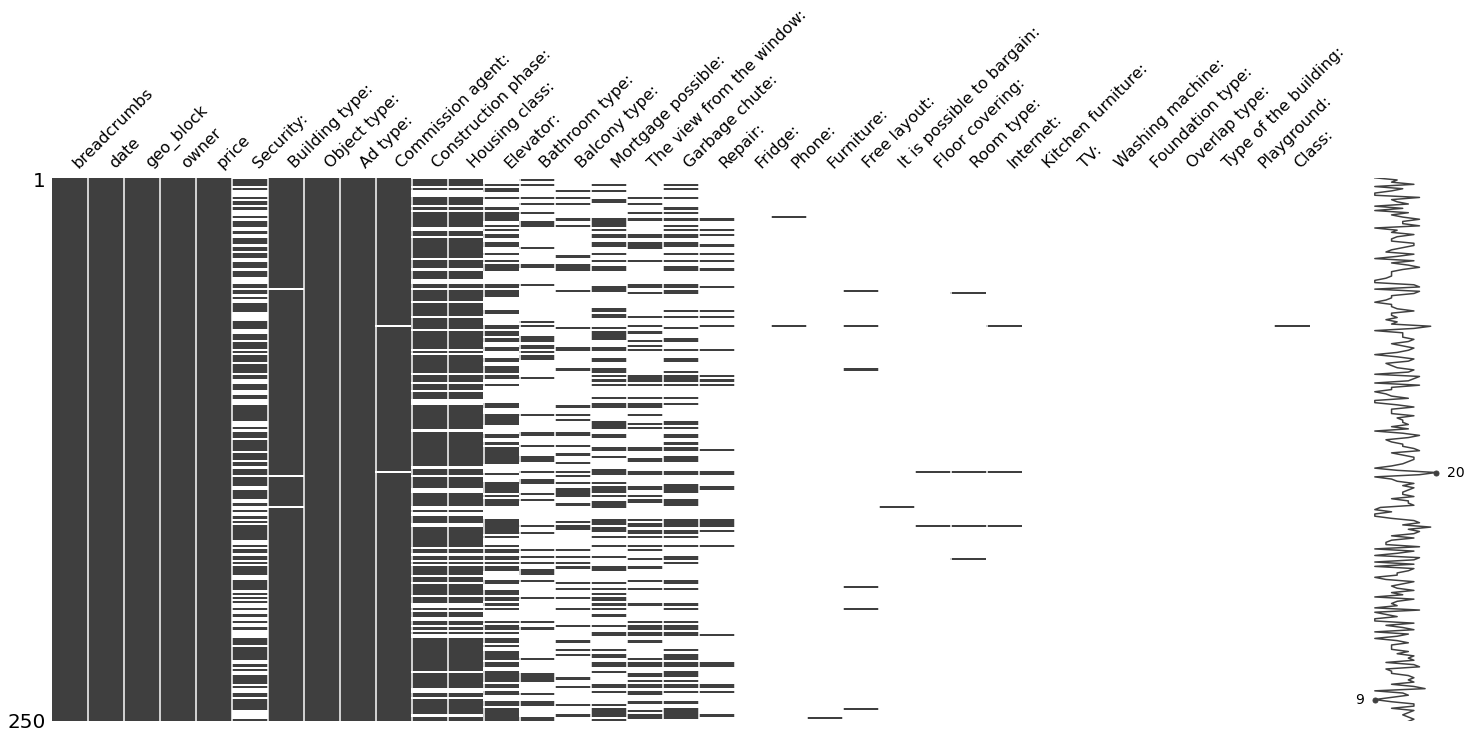

In [7]:
msno.matrix(df.sample(250));

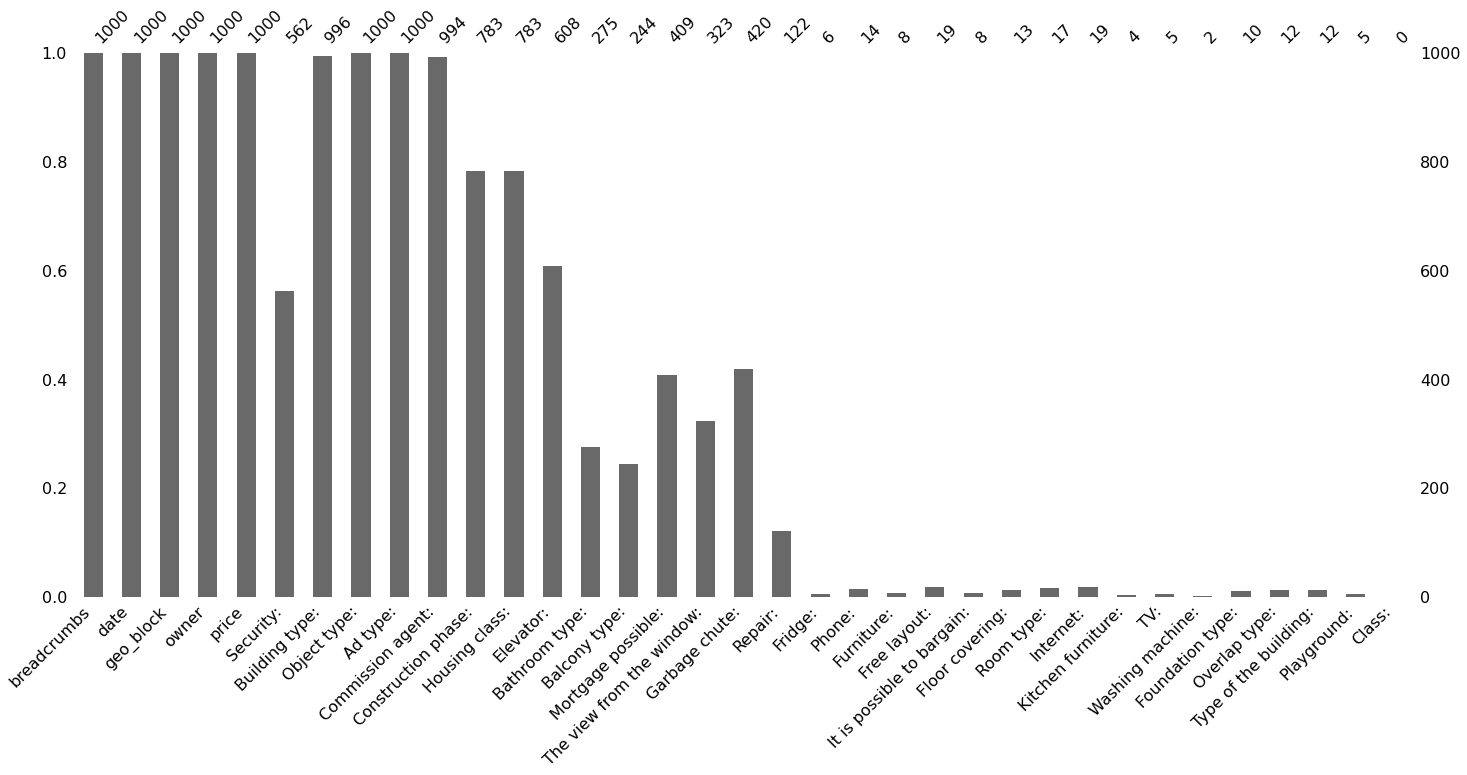

In [9]:
msno.bar(df.sample(1000));

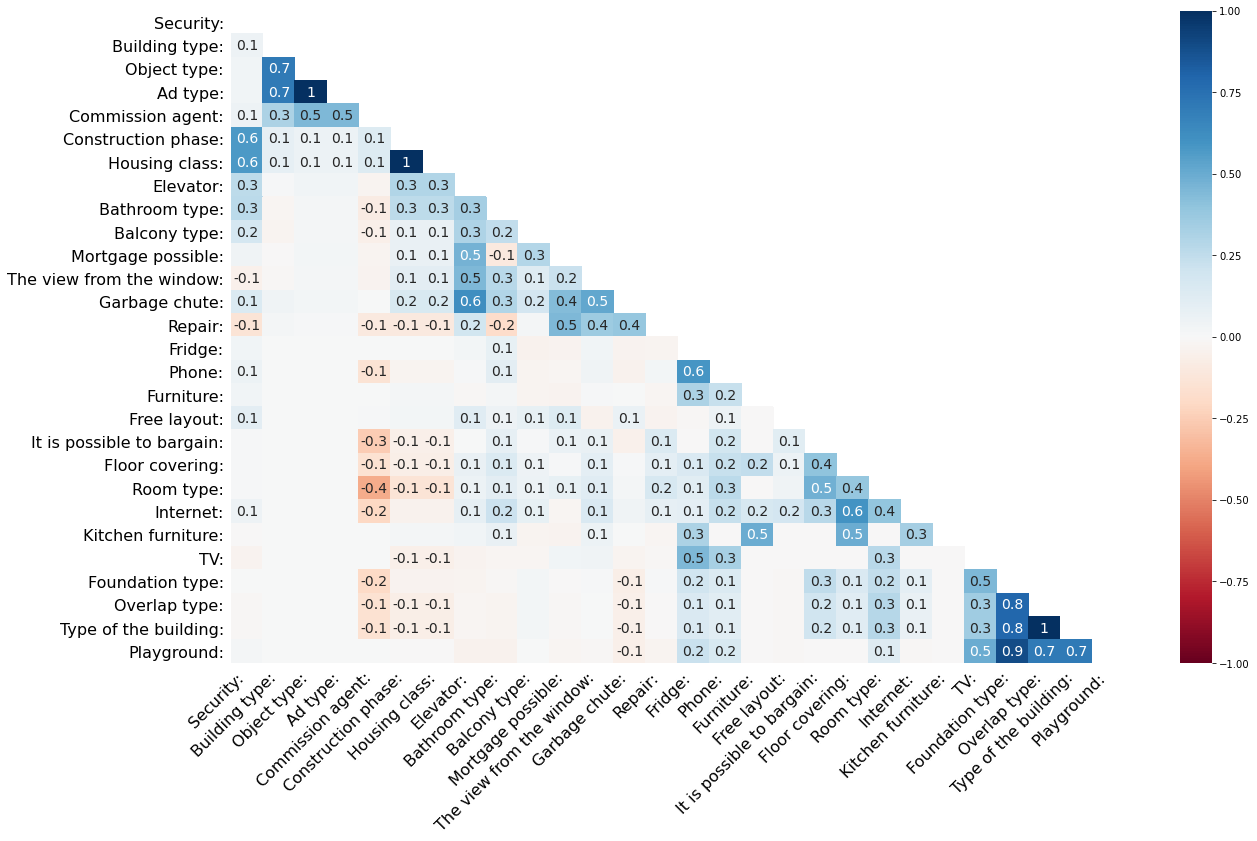

In [10]:
#koleracja
msno.heatmap(df.sample(1000));

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45694 entries, 0 to 45693
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   breadcrumbs                 45694 non-null  object 
 1   date                        45694 non-null  object 
 2   geo_block                   45694 non-null  object 
 3   owner                       45694 non-null  object 
 4   price                       45694 non-null  float64
 5   Security:                   26186 non-null  object 
 6   Building type:              45520 non-null  object 
 7   Object type:                45686 non-null  object 
 8   Ad type:                    45686 non-null  object 
 9   Commission agent:           45371 non-null  object 
 10  Construction phase:         35768 non-null  object 
 11  Housing class:              35768 non-null  object 
 12  Elevator:                   26821 non-null  object 
 13  Bathroom type:              123

In [18]:
df["Construction phase:"].value_counts()

Building walls    13760
Finish             7218
Commissioned       6239
Pit                3926
Playground         3658
Project             900
Is GK                67
Name: Construction phase:, dtype: int64

In [20]:
df["Construction phase:"].value_counts(normalize=True)

Building walls    0.384701
Finish            0.201800
Commissioned      0.174430
Pit               0.109763
Playground        0.102270
Project           0.025162
Is GK             0.001873
Name: Construction phase:, dtype: float64

In [21]:
df["Construction phase:_cat"] = df["Construction phase:"].factorize()[0]

In [24]:
cat_feats =  [x for x in df.columns if ":" in x]

In [28]:
for feat in tqdm(cat_feats) : 
    df["{}_cat".format(feat)] = df[feat].factorize()[0]

100%|██████████| 31/31 [00:00<00:00, 129.82it/s]


In [27]:
df

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:,Construction phase:_cat,Security:_cat,Building type:_cat,Object type:_cat,Ad type:_cat,Commission agent:_cat,Housing class:_cat,Elevator:_cat,Bathroom type:_cat,Balcony type:_cat,Mortgage possible:_cat,The view from the window:_cat,Garbage chute:_cat,Repair:_cat,Fridge:_cat,Phone:_cat,Furniture:_cat,Free layout:_cat,It is possible to bargain:_cat,Floor covering:_cat,Room type:_cat,Internet:_cat,Kitchen furniture:_cat,TV:_cat,Washing machine:_cat,Foundation type:_cat,Overlap type:_cat,Type of the building:_cat,Playground:_cat,Class:_cat,Construction phase:_cat_cat
0,"[Москва, МЦК Лужники]","[23 февраля 2018, 133, (+2 за сегодня), Обновл...","[г. Москва, г. Москва]",[],380.610000,"secure Parking, video surveillance, 24-hour se...",Brick,apartments,new building,no fee,Commissioned,Elite class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[сегодня в 04:52, 3, (+3 за сегодня)]","[Новая Москва, п. Сосенское, п. Коммунарка, Юж...",[],8.004631,Yes,Monolithic-brick,flat,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,0,1,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,"[Москва, МЦК Крымская, ул. Поляны]","[5 марта, 6, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, ул Поляны, г. Москва, ул Поляны]",[],6.520000,provided,Monolithic,apartments,from the developer,no fee,Finish,Comfort class,yes,combined,NaN,NaN,yard,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,0,1,0,1,0,1,-1,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2
3,"[Москва, Беговой, м. Динамо, МЦК Хорошёво]","[22 мая 2018, 60, (+2 за сегодня), Обновлено 1...","[г. Москва, Беговой, г. Москва, Беговой]",[],20.269686,NaN,Monolithic,flat,new building,no fee,NaN,NaN,yes,NaN,loggia,yes,street,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,2,1,0,0,-1,0,-1,1,0,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3
4,"[Москва, Филёвский Парк, м. Фили, МЦК Шелепиха]","[26 декабря 2018, 13, (+1 за сегодня), Обновле...","[г. Москва, Филёвский Парк, г. Москва, Филёвск...",[],15.100880,NaN,Monolithic,apartments,secondary,no fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,2,0,2,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45689,"[Москва, Солнцево, м. Говорово, МЦК Лужники]","[12 апреля, 10, (+1 за сегодня), Обновлено 14 ...","[г. Москва, Солнцево, г. Москва, Солнцево]",[],7.896240,NaN,Panel,flat,new building,no fee,Building walls,Comfort class,yes,NaN,NaN,yes,yard,yes,euro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1,3,1,0,0,1,0,-1,-1,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
45690,"[Москва, МЦК Кутузовская]","[13 апреля, 10, (+1 за сегодня), Обновлено 17 ...","[г. Москва, г. Москва]",[],16.920000,provided,Monolithic,apartments,from the developer,no fee,Building walls,Business class,yes,two,NaN,NaN,yard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [30]:
num_feats =  [x for x in df.columns if "_cat" in x]
num_feats

['Construction phase:_cat',
 'Security:_cat',
 'Building type:_cat',
 'Object type:_cat',
 'Ad type:_cat',
 'Commission agent:_cat',
 'Housing class:_cat',
 'Elevator:_cat',
 'Bathroom type:_cat',
 'Balcony type:_cat',
 'Mortgage possible:_cat',
 'The view from the window:_cat',
 'Garbage chute:_cat',
 'Repair:_cat',
 'Fridge:_cat',
 'Phone:_cat',
 'Furniture:_cat',
 'Free layout:_cat',
 'It is possible to bargain:_cat',
 'Floor covering:_cat',
 'Room type:_cat',
 'Internet:_cat',
 'Kitchen furniture:_cat',
 'TV:_cat',
 'Washing machine:_cat',
 'Foundation type:_cat',
 'Overlap type:_cat',
 'Type of the building:_cat',
 'Playground:_cat',
 'Class:_cat',
 'Construction phase:_cat_cat']

In [31]:
#zbiory do modelu
X = df[num_feats].values
y = df["price"].values

In [32]:
#parametry dla xgb
xgb_params = dict(
    max_depth=5, 
    n_estimators=50, 
    learning_rate=0.3, 
    random_state=0)


In [33]:
#model
model = xgb.XGBRegressor(**xgb_params)
model.fit(X, y)
y_pred = model.predict(X)


In [34]:
mean_absolute_error(y, y_pred)

6.722959791765502

In [35]:
#cross walidacja aby unikanac przeuczenia
scores = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-7.188799877902409, 0.3198427960875339)

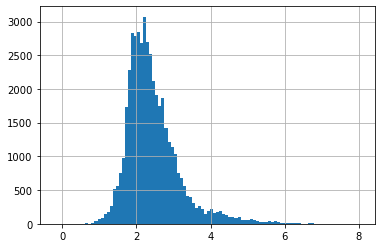

In [37]:
np.log(df["price"]).hist(bins=100);

In [38]:
#parametry dla xgb
xgb_params = dict(
    max_depth=5, 
    n_estimators=50, 
    learning_rate=0.3, 
    random_state=0)

In [40]:
#model
y_log = np.log(y)
model = xgb.XGBRegressor(**xgb_params)
model.fit(X, y_log)
y_log_pred = model.predict(X)
y_pred = np.exp(y_log_pred)

In [41]:
mean_absolute_error(y, y_pred)

6.021261634751976